Description of whats going on

In [1]:
import numpy as np

GFZ = np.linspace(0.1, 8, 80) #min, max, steps
A = 37.
dy = 9.2
dx = 0.085
EUI=38.34 # kWh EE /m2NGF = 62.5 kWh PE / m²NGF
NGFtoBGF=0.8
PE_strom = 1.63 #kWh PE / kWh EE

def target(GFZ, A=A,dy=dy,dx=dx,EUI=EUI,fPE=PE_strom, NGFtoBGF=NGFtoBGF):
    return (( dy + A/(dx + GFZ) - EUI )* fPE) * NGFtoBGF

In [2]:
#read excel
import pandas as pd

df_raw = pd.read_excel("C:/Users/Simon Schneider/Nextcloud/EE/6_Daten/Quartiere/Projekt-Varianten-Verzeichnis.xlsx",
                   sheet_name="Sample points",
                   header=0)
df_raw

,Name,Quartier,Forschungsprojekt,Land,Stadt,Variante,Kommentar,Erstellungsdatum,Erstellungskommentar,BGF [m²],...,Netzdienlichkeit Direkt- und Überdeckung (ohne E-Batterie)81,Netzstrom82,Abwärme83,Summe84,GFZ85,Primärenergiesaldo ohne Dichteausgleich86,PE-Saldo Ziel NGF87,PE-Anforderung erreicht? Werte inkl. Dichtebonus88,"PE-Saldo Ziel BGF default (NGF/BGF=0,8)89","PE-Saldo Ziel BGF real (NGF/BGF=0,85)90"
0,"EFH ""Energiespeicher Beton""",NaN,NaN,NaN,NaN,PV sehr effizient,NaN,8.3.2021,Quelle: Thomas mail (8.3.2021) GrafikeBMK_Eing...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Am Bichl - Standard,Am Bichl,ZQ Austria,Österreich,Am Bichl,Standard,NaN,2021-08-17 00:00:00,Für Variantenvergleich erstellt,5123.375,...,0.0000,18.450384,0.0,54.079926,0.344429,176.969925,92.938448,84.031476,74.350759,78.997681
2,"EFH ""Energiespeicher Beton""",NaN,NaN,NaN,NaN,inkl. PVStandard,NaN,8.3.2021,Quelle: Thomas mail (8.3.2021) GrafikeBMK_Eing...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Am Bichl - DSM,Am Bichl,ZQ Austria,Österreich,Am Bichl,Mit DSM,NaN,2021-08-17 00:00:00,Für Variantenvergleich erstellt,5123.375,...,25.8305,0.000000,0.0,44.071860,0.688857,108.320637,30.430281,77.890356,24.344225,25.865739
4,"EFH ""Energiespeicher Beton""",NaN,NaN,NaN,NaN,inkl. PVbesteFlächen,NaN,8.3.2021,Quelle: Thomas mail (8.3.2021) GrafikeBMK_Eing...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,Zeile_Aufstockung_PH-Midi!Fossil,NaN,SC Mikroquartiere,Österreich,NaN,Fossil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,Zeile_Aufstockung_PH-Midi!Erneuerbare,NaN,SC Mikroquartiere,Österreich,NaN,Erneuerbare,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,Zeile_Aufstockung_PH_Eco!Fossil,NaN,SC Mikroquartiere,Österreich,NaN,Fossil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,Zeile_Aufstockung_PH_Eco!Erneuerbare,NaN,SC Mikroquartiere,Österreich,NaN,Erneuerbare,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cols = ["Projekt","Variante","GFZ","PV Strategie","PEB [kWh/m²BGFa]","PV Ertrag [kWh/m²BGFa]" ]
#plot as per quality
df = df_raw


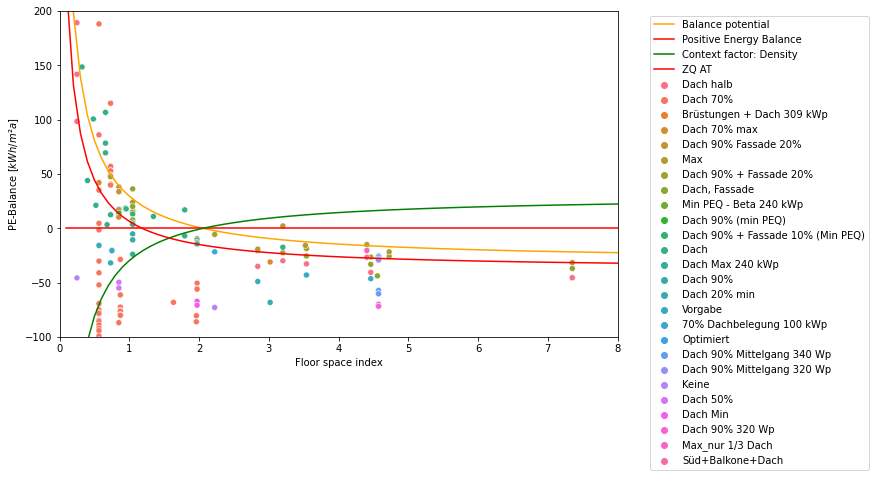

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.set_palette("Set2") #"Reds"
sns.scatterplot(ax=ax,
                x="GFZ",
                y="PEB [kWh/m²BGFa]",
                hue="PV Strategie",
                data=df)



t = pd.DataFrame({"Balance potential":target(GFZ, A=50, dy=15),
                  "Positive Energy Balance":np.zeros(len(GFZ)),
                  "Context factor: Density":-target(GFZ, A=50, dy=15)}, index=GFZ)



t_orig = pd.DataFrame({"ZQ AT":target(GFZ, A=37, dy=9.2, dx=0.085)}, index=GFZ)


t.plot(ax=ax, color=["orange","red", "green"])
t_orig.plot(ax=ax, color=["red"])
ax.set_ylim(-100,200)
ax.set_xlim(0,8)
ax.set_ylabel("PE-Balance $[{kWh/m²a}]$")
ax.set_xlabel("Floor space index")
ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("Hypo", bbox_inches="tight", dpi=200)

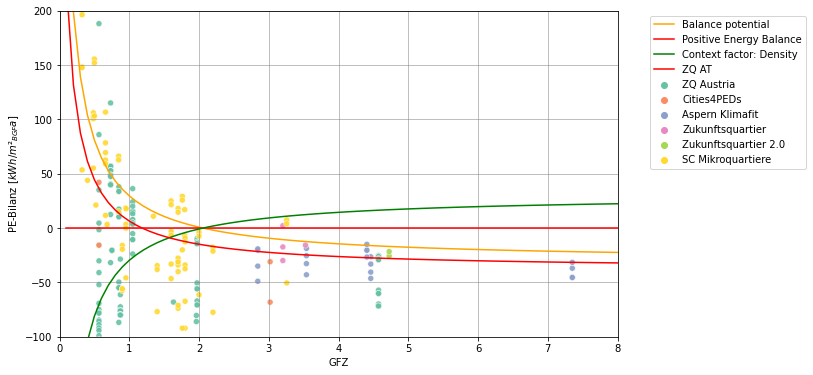

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
# ax.set(xlabel="FSI", ylabel="PE-Target $[kWh/m²_{GCF}]$")

t.plot(ax=ax, color=["orange","red", "green"])
t_orig.plot(ax=ax, color=["red"])
sns.scatterplot(ax=ax,
                x="GFZ",
                y="PEB [kWh/m²BGFa]",
                hue="Forschungsprojekt",
                #size="PV Ertrag [kWh/m²BGFa]",
                alpha=0.9,
                data=df)
ax.set_ylim(-100,200)
ax.grid(color='grey', linestyle='-', linewidth=0.5)
ax.set_xlim(0,8)
ax.set_ylabel("PE-Bilanz $[{kWh/m²_{BGF}a}]$")

ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("sample_points", bbox_inches="tight", dpi=200)

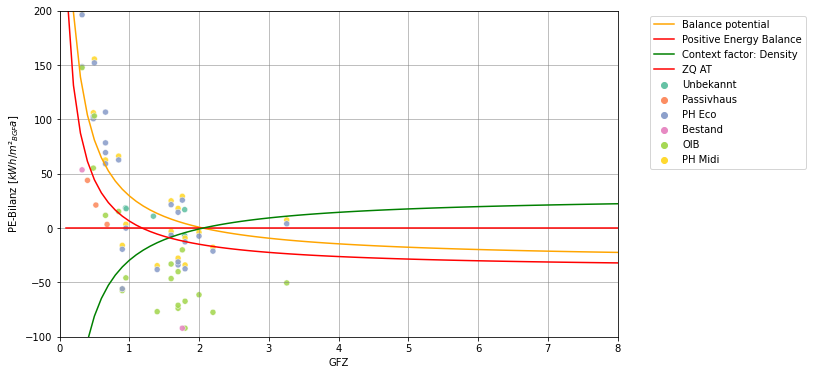

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
# ax.set(xlabel="FSI", ylabel="PE-Target $[kWh/m²_{GCF}]$")

t.plot(ax=ax, color=["orange","red", "green"])
t_orig.plot(ax=ax, color=["red"])

sns.scatterplot(ax=ax,
                x="GFZ",
                y="PEB [kWh/m²BGFa]",
                hue="U-Werte",
                #size="PV Ertrag [kWh/m²BGFa]",
                alpha=0.9,
                data=df[df["Forschungsprojekt"]=="SC Mikroquartiere"])
ax.set_ylim(-100,200)
ax.grid(color='grey', linestyle='-', linewidth=0.5)
ax.set_xlim(0,8)
ax.set_ylabel("PE-Bilanz $[{kWh/m²_{BGF}a}]$")

ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("Baustandard", bbox_inches="tight", dpi=200)

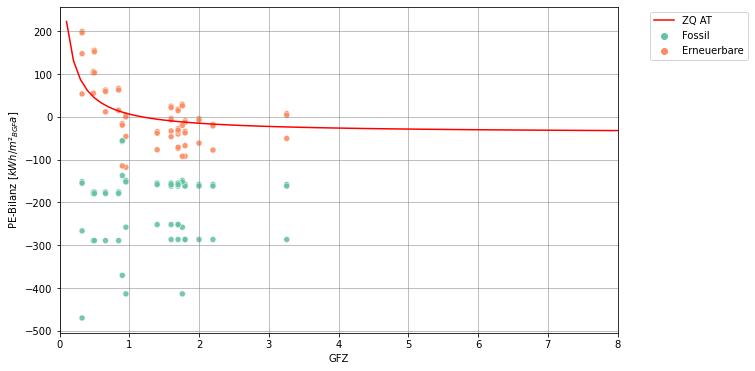

In [7]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
# ax.set(xlabel="FSI", ylabel="PE-Target $[kWh/m²_{GCF}]$")

#t.plot(ax=ax, color=["orange","red", "green"])
t_orig.plot(ax=ax, color=["red"])

sns.scatterplot(ax=ax,
                x="GFZ",
                y="PEB [kWh/m²BGFa]",
                hue="Variante",
                #size="PV Ertrag [kWh/m²BGFa]",
                alpha=0.9,
                data=df[df["Variante"].isin(["Fossil", "Erneuerbare"])])
#ax.set_ylim(-100,200)
ax.grid(color='grey', linestyle='-', linewidth=0.5)
ax.set_xlim(0,8)
ax.set_ylabel("PE-Bilanz $[{kWh/m²_{BGF}a}]$")

ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig("SCMicro", bbox_inches="tight", dpi=200)

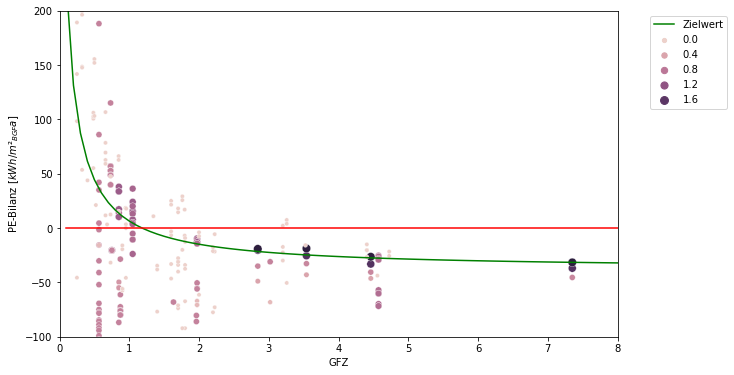

In [8]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.set_palette("Reds")
sns.scatterplot(ax=ax,
                x="GFZ",
                y="PEB [kWh/m²BGFa]",
                size="PV Ausnutzung",
                hue="PV Ausnutzung",
                data=df)



t = pd.DataFrame({"Zielwert":target(GFZ),
                           "":np.zeros(len(GFZ))}, index=GFZ)


t.plot(ax=ax, color=["green","red"])
ax.set_ylim(-100,200)
ax.set_xlim(0,8)
ax.set_ylabel("PE-Bilanz $[{kWh/m²_{BGF}a}]$")
ax.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("PV Ausnutzung", bbox_inches="tight", dpi=200)

In [9]:
def plot_curve(name, hue, size, savefig=True):
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    sns.set_palette("Set2")
    sns.scatterplot(ax=ax,
                    x="GFZ",
                    y="PEB [kWh/m²BGFa]",
                    size=size,
                    hue=hue,
                    data=df)

    t = pd.DataFrame({"Zielwert":target(GFZ),
                               "":np.zeros(len(GFZ))}, index=GFZ)


    t.plot(ax=ax, color=["green","red"])
    ax.set_ylim(-100,200)
    ax.set_xlim(0,8)
    ax.set_ylabel("PE-Bilanz $[{kWh/m²_{BGF}a}]$")
    ax.legend(title=name, bbox_to_anchor=(1.05, 1), loc='upper left')

    if savefig:
        plt.savefig(name, bbox_inches="tight", dpi=200)

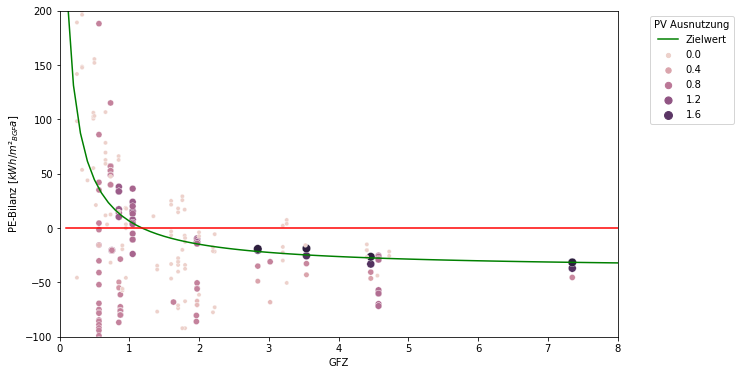

In [10]:
plot_curve("PV Ausnutzung", hue="PV Ausnutzung", size="PV Ausnutzung")

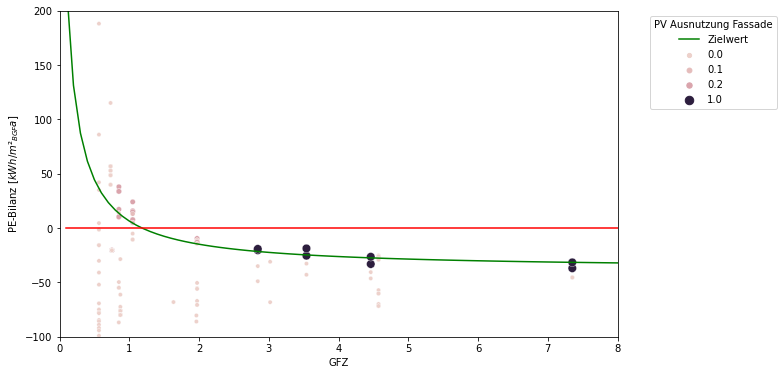

In [11]:
plot_curve("PV Ausnutzung Fassade", hue="PV Ausnutzung Fassade", size="PV Ausnutzung Fassade")

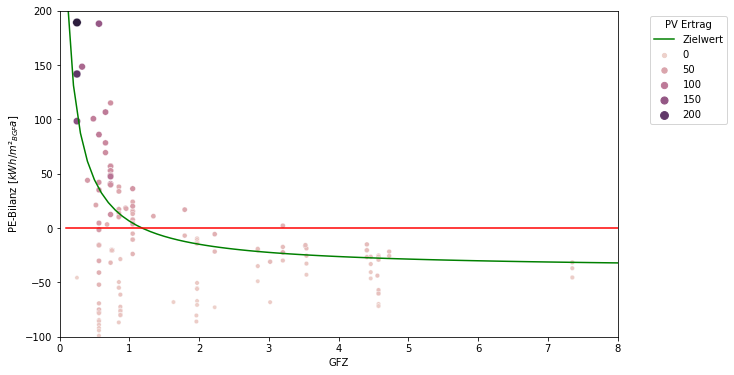

In [12]:
plot_curve("PV Ertrag", hue="PV Ertrag [kWh/m²BGFa]", size="PV Ertrag [kWh/m²BGFa]")

In [13]:
df.columns

Index(['Name', 'Quartier', 'Forschungsprojekt', 'Land', 'Stadt', 'Variante',
       'Kommentar', 'Erstellungsdatum', 'Erstellungskommentar', 'BGF [m²]',
       ...
       'Netzdienlichkeit Direkt- und Überdeckung (ohne E-Batterie)81',
       'Netzstrom82', 'Abwärme83', 'Summe84', 'GFZ85',
       'Primärenergiesaldo ohne Dichteausgleich86', 'PE-Saldo Ziel NGF87',
       'PE-Anforderung erreicht? Werte inkl. Dichtebonus88',
       'PE-Saldo Ziel BGF default (NGF/BGF=0,8)89',
       'PE-Saldo Ziel BGF real (NGF/BGF=0,85)90'],
      dtype='object', length=207)

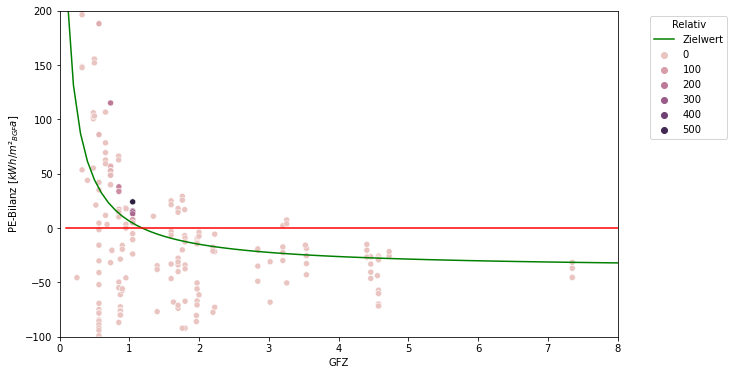

In [14]:
plot_curve("Relativ", hue="Überschreitung in %", size=None)

In [15]:

import math

